# Data Exploration

## 1. checking the data columns types

In [1]:
import pandas as pd

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", 
    "sex", "capital-gain", "capital-loss", "hours-per-week", 
    "native-country", "income"
]

df = pd.read_csv('adult/adult.data', header=None, names=columns)
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [2]:
# Comparing Data Types

data_types = df.dtypes
data_types

expected_types = {
    "age": "int64", "workclass": "object", "fnlwgt": "int64", "education": "object", "education-num": "int64",
    "marital-status": "object", "occupation": "object", "relationship": "object", "race": "object", "sex": "object",
    "capital-gain": "int64", "capital-loss": "int64", "hours-per-week": "int64", "native-country": "object", "income": "object"
}

# compare extected with actual types
type_comparison = pd.DataFrame({
    "Column": df.columns,
    "Actual Type": data_types.values,
    "Expected Type": [expected_types[col] for col in df.columns]
})
print(type_comparison)

            Column Actual Type Expected Type
0              age       int64         int64
1        workclass      object        object
2           fnlwgt       int64         int64
3        education      object        object
4    education-num       int64         int64
5   marital-status      object        object
6       occupation      object        object
7     relationship      object        object
8             race      object        object
9              sex      object        object
10    capital-gain       int64         int64
11    capital-loss       int64         int64
12  hours-per-week       int64         int64
13  native-country      object        object
14          income      object        object


In [3]:
df = df.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))

In [4]:
# Compare types of Selection Values (categorical)

expected_values = {
    "workclass": [
        "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov",
        "State-gov", "Without-pay", "Never-worked"
    ],
    "education": [
        "Bachelors", "Some-college", "11th", "HS-grad", "Prof-school", "Assoc-acdm",
        "Assoc-voc", "9th", "7th-8th", "12th", "Masters", "1st-4th", "10th", 
        "Doctorate", "5th-6th", "Preschool"
    ],
    "marital-status": [
        "Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", 
        "Married-spouse-absent", "Married-AF-spouse"
    ],
    "occupation": [
        "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial",
        "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical",
        "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv",
        "Armed-Forces"
    ],
    "relationship": [
        "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", 
        "Unmarried"
    ],
    "race": [
        "White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other", "Black"
    ],
    "sex": ["Female", "Male"],
    "native-country": [
        "United-States", "Cambodia", "England", "Puerto-Rico", "Canada", "Germany", 
        "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece", "South", "China", 
        "Cuba", "Iran", "Honduras", "Philippines", "Italy", "Poland", "Jamaica", 
        "Vietnam", "Mexico", "Portugal", "Ireland", "France", "Dominican-Republic", 
        "Laos", "Ecuador", "Taiwan", "Haiti", "Columbia", "Hungary", "Guatemala", 
        "Nicaragua", "Scotland", "Thailand", "Yugoslavia", "El-Salvador", 
        "Trinadad&Tobago", "Peru", "Hong", "Holand-Netherlands"
    ],
    "income": [">50K", "<=50K"]
}

validation_results = {}
for column, expected in expected_values.items():
    unique_values = df[column].unique()
    invalid_values = [val for val in unique_values if val.strip() not in expected]
    validation_results[column] = {
        "Valid": len(invalid_values) == 0,
        "Invalid Values": invalid_values
    }

# visualize dict as dataframe
pd.DataFrame.from_dict(validation_results, orient="index")

,Valid,Invalid Values
workclass,False,[?]
education,True,[]
marital-status,True,[]
occupation,False,[?]
relationship,True,[]
race,True,[]
sex,True,[]
native-country,False,[?]
income,True,[]


## 2. Missing Values

In [7]:
import numpy as np

df.replace('?', np.nan, inplace=True)

In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## 3. Exploring the fields **capital_gain** and **capital_loss**

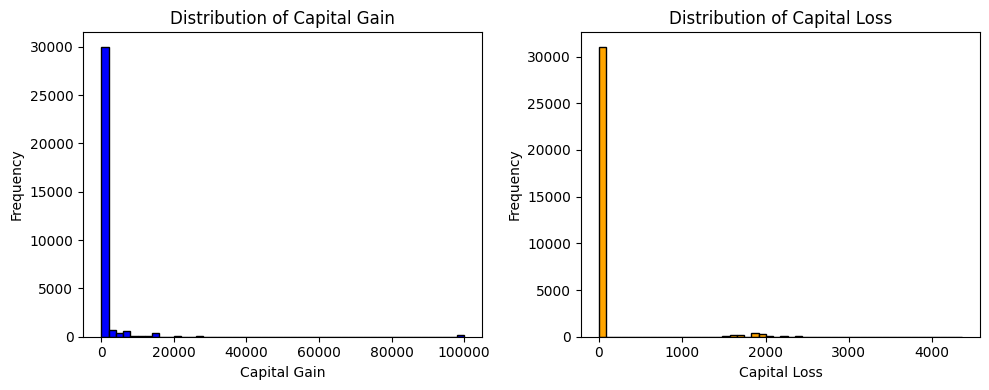

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# capital-gain
plt.subplot(1, 2, 1)
plt.hist(df["capital-gain"], bins=50, color="blue", edgecolor="black")
plt.title("Distribution of Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Frequency")

# capital-loss
plt.subplot(1, 2, 2)
plt.hist(df["capital-loss"], bins=50, color="orange", edgecolor="black")
plt.title("Distribution of Capital Loss")
plt.xlabel("Capital Loss")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [16]:
# Transform cols to Categorical

capital_gain_median = df["capital-gain"][df["capital-gain"] > 0].median() if df["capital-gain"].median() > 0 else None
capital_loss_median = df["capital-loss"][df["capital-loss"] > 0].median() if df["capital-loss"].median() > 0 else None
# Create bins for capital-gain
if capital_gain_median:
    df["capital_gain_cat"] = pd.cut(
        df["capital-gain"], 
        bins=[-1, 0, capital_gain_median, df["capital-gain"].max()], 
        labels=["None", "Low", "High"]
    )
else:
    df["capital_gain_cat"] = pd.cut(
        df["capital-gain"], 
        bins=[-1, 0, df["capital-gain"].max()], 
        labels=["None", "Some"]
    )

# Create bins for capital-loss
if capital_loss_median:
    df["capital_loss_cat"] = pd.cut(
        df["capital-loss"], 
        bins=[-1, 0, capital_loss_median, df["capital-loss"].max()], 
        labels=["None", "Low", "High"]
    )
else:
    df["capital_loss_cat"] = pd.cut(
        df["capital-loss"], 
        bins=[-1, 0, df["capital-loss"].max()], 
        labels=["None", "Some"]
    )

Distribution of New Categorical Variables:
  Category  Capital Gain Count  Capital Loss Count
0     None               29849               31042
1     Some                2712                1519


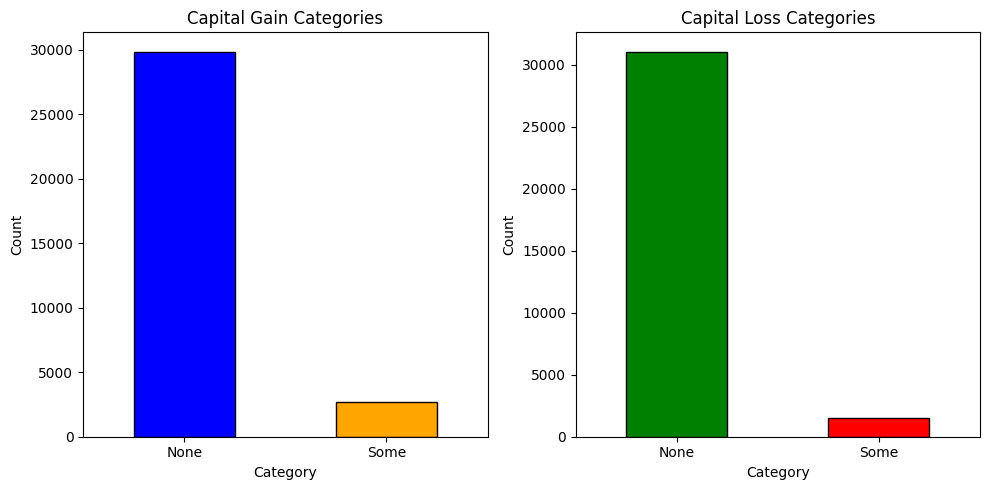

In [17]:
# Display the new Categorical Variables

capital_gain_dist = df["capital_gain_cat"].value_counts()
capital_loss_dist = df["capital_loss_cat"].value_counts()

# Display the distributions in a table format
distribution_table = pd.DataFrame({
    "Category": ["None", "Some"],
    "Capital Gain Count": capital_gain_dist.values,
    "Capital Loss Count": capital_loss_dist.values
})

print("Distribution of New Categorical Variables:")
print(distribution_table)

# Plot the distributions
plt.figure(figsize=(10, 5))

# Capital Gain
plt.subplot(1, 2, 1)
capital_gain_dist.plot(kind="bar", color=["blue", "orange"], edgecolor="black")
plt.title("Capital Gain Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)

# Capital Loss
plt.subplot(1, 2, 2)
capital_loss_dist.plot(kind="bar", color=["green", "red"], edgecolor="black")
plt.title("Capital Loss Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 4-5. Analyzing the Distribution of fnlwgt

Mean fnlwgt: 189778.36651208502
Median fnlwgt: 178356.0
Skewness of fnlwgt: 1.446913435142329


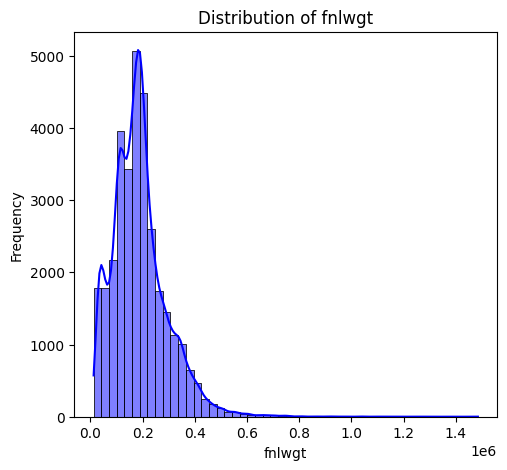

In [18]:
import seaborn as sns
from scipy.stats import skew

plt.figure(figsize=(12, 5))

# overall distriution
plt.subplot(1, 2, 1)
sns.histplot(df["fnlwgt"], kde=True, color="blue", bins=50)
plt.title("Distribution of fnlwgt")
plt.xlabel("fnlwgt")
plt.ylabel("Frequency")

# Numerical Summary
fnlwgt_mean = df["fnlwgt"].mean()
fnlwgt_median = df["fnlwgt"].median()
fnlwgt_skewness = skew(df["fnlwgt"])

print(f"Mean fnlwgt: {fnlwgt_mean}")
print(f"Median fnlwgt: {fnlwgt_median}")
print(f"Skewness of fnlwgt: {fnlwgt_skewness}")

**Histogram**:
- The distribution of fnlwgt is heavily right-skewed, with the majority of values concentrated near the lower end and a long tail toward higher values.

**Numerical Analysis**:
- Mean: 189778.37
- Median: 178356.0
- Skewness: 1.447 (significant right skewness).

**Conclusion**:<br/>
The mean is slightly higher than the median, indicating right-skewness in the data.
Most samples represent a small fraction of the population, with a few outliers representing larger shares.

C:\Users\bay\AppData\Local\Temp\ipykernel_6584\2816677319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="sex", y="fnlwgt", palette="Set2")
C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:94

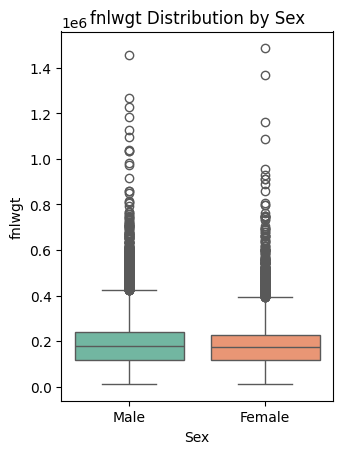

In [19]:
# compare distribution between men and women
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="sex", y="fnlwgt", palette="Set2")
plt.title("fnlwgt Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("fnlwgt")

plt.tight_layout()
plt.show()

**Boxplot Observations**:
The fnlwgt distributions for both men and women are similar in structure
- both distributions have a dense lower range and a significant number of outliers in the higher range
- medians are almost identical for men and women

**Conclusion**:<br/>
The fnlwgt distribution does not show significant differences between men and women, suggesting that sampling weights are applied uniformly across genders

In [20]:
# Identify outliers using the IQR method
Q1 = df["fnlwgt"].quantile(0.25)
Q3 = df["fnlwgt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df["fnlwgt"] < lower_bound) | (df["fnlwgt"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 992


---

# Correlation

## 1. Correlation Analysis

In [23]:
columns_to_analyze = ["age", "education-num", "hours-per-week"]

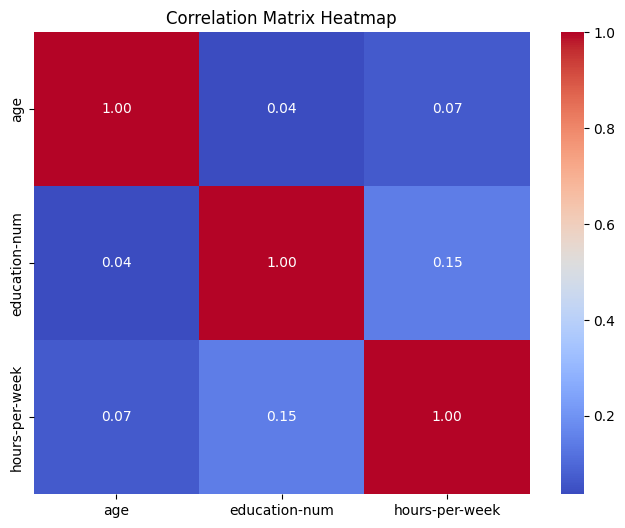

In [24]:
# compute correlation matrix
correlation_matrix = df[columns_to_analyze].corr()
# visualize as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

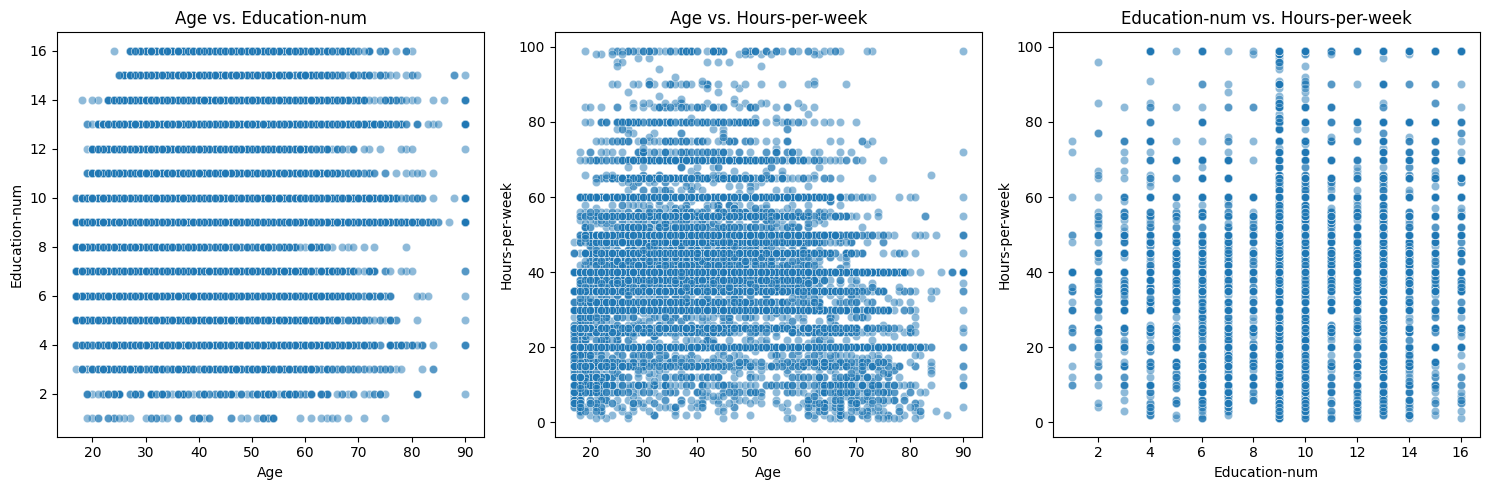

In [25]:
# Scatterplots to visualize relationships
plt.figure(figsize=(15, 5))

# Age vs. Education-num
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="age", y="education-num", alpha=0.5)
plt.title("Age vs. Education-num")
plt.xlabel("Age")
plt.ylabel("Education-num")

# Age vs. Hours-per-week
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="age", y="hours-per-week", alpha=0.5)
plt.title("Age vs. Hours-per-week")
plt.xlabel("Age")
plt.ylabel("Hours-per-week")

# Education-num vs. Hours-per-week
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="education-num", y="hours-per-week", alpha=0.5)
plt.title("Education-num vs. Hours-per-week")
plt.xlabel("Education-num")
plt.ylabel("Hours-per-week")

plt.tight_layout()
plt.show()

- Age and education-num: correlation coefficient = 0.04
    - this indicates almost no correlation between a person's age and their years of education
    - the scatterplot confirms this; education levels are spread across all age groups without a clear pattern

- Age and Hours-per-week: correlation coefficient = 0.07
    - the correlation is weak and insignificant. The scatterplot suggests a slight clustering around typical working hours (40h per week) but no noticeable relationship with age.
 
- Education-num and Hours-per-week: Correlation coefficient = 0.15
    - this is a weak positive correlation, implying that individuals with more years of education may work slightly more hours per week. The scatterplot hints at some clustering for higher education levels around 40-50 hours per week.
 
**Conclusion**<br/>
None of the variable pairs (age, education-num, hours-per-week) show strong correlations. These variables do not strongly influence each other and may need to be studied alongside other features. For modeling purposes, these variables can likeyly be treated as independent in relation to one another.

## 2. Statistical testing Correlation

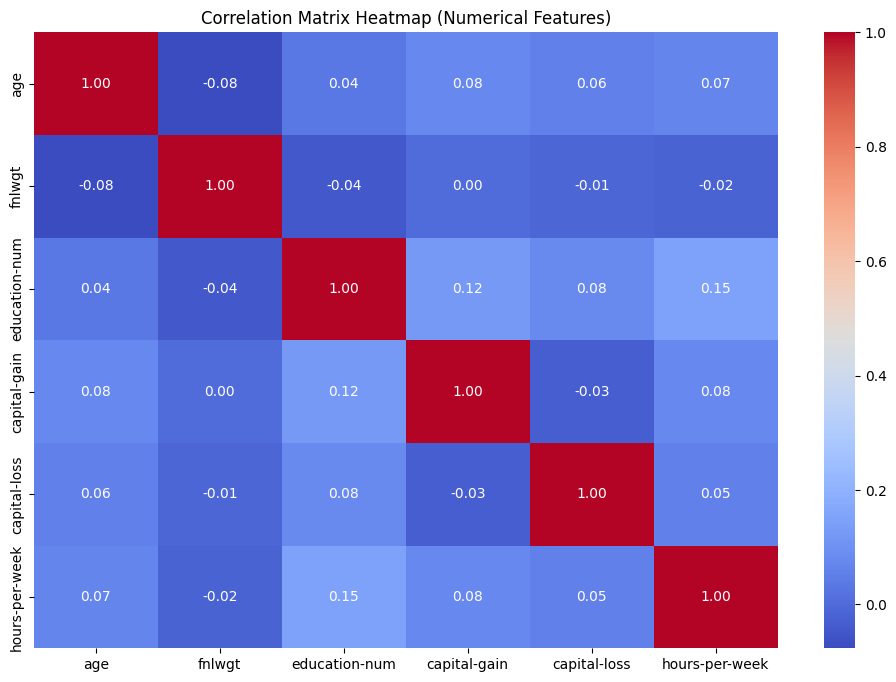

In [28]:
# Dynamically select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap (Numerical Features)")
plt.show()


In [29]:
from scipy.stats import pearsonr

# Perform the Pearson correlation test for education-num and hours-per-week
corr, p_value = pearsonr(df["education-num"].dropna(), df["hours-per-week"].dropna())

print(f"Correlation Coefficient (education-num vs. hours-per-week): {corr:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is not statistically significant (p >= 0.05).")


Correlation Coefficient (education-num vs. hours-per-week): 0.15
P-value: 0.0000
The correlation is statistically significant (p < 0.05).


education-num vs. hours-per-week: Correlation = 0.15
- This is the strongest (but still weak) positive correlation in the dataset.
- Interpretation: Individuals with more years of education may work slightly more hours per week, but the relationship is not strong enough to draw significant conclusions.

The positive direction aligns with expectations: Higher education often corresponds to professions that require more working hours (e.g., full-time salaried positions).

## 3. education-num and age for Males and Females

In [30]:
male_data = df[df["sex"] == "Male"]
female_data = df[df["sex"] == "Female"]

# Compute the correlation and p-value
male_corr, male_p_value = pearsonr(male_data["education-num"].dropna(), male_data["age"].dropna())
female_corr, female_p_value = pearsonr(female_data["education-num"].dropna(), female_data["age"].dropna())

print("Correlation Between Education-num and Age by Gender:")
print(f"Male Correlation: {male_corr:.2f}, P-value: {male_p_value:.4f}")
print(f"Female Correlation: {female_corr:.2f}, P-value: {female_p_value:.4f}")

if male_p_value < 0.05:
    print("The correlation for males is statistically significant (p < 0.05).")
else:
    print("The correlation for males is not statistically significant (p >= 0.05).")
if female_p_value < 0.05:
    print("The correlation for females is statistically significant (p < 0.05).")
else:
    print("The correlation for females is not statistically significant (p >= 0.05).")

Correlation Between Education-num and Age by Gender:
Male Correlation: 0.06, P-value: 0.0000
Female Correlation: -0.02, P-value: 0.0632
The correlation for males is statistically significant (p < 0.05).
The correlation for females is not statistically significant (p >= 0.05).


**Comparison**
- The correlation for males is positive and statistically significant, while the correlation for females is slightly negative and not statistically significant.
- This disparity could reflect generational or societal factors:
    - Older male participants might have had more access to educational opportunities, leading to a positive correlation with age.
 
**Expectations**:
- The weak positive correlation in male results aligns with expectations, as education is often fixed by early adulthood, but older generations may exhibit slightly different trends in access to education.
- The lack of a significant correlation in female results is also expected, given historical barriers to female education in older generations.

**Conclusion**
- The statistically significant positive correlation for males suggests a slight trend worth considering, though its strength is weak.
- The insignificant correlation for females reflects a lack of a systematic relationship between education and age, aligning with broader historical and social contexts.

## 4. Covariance Matrix

In [31]:
# Compute the covariance matrix
covariance_matrix = df[["education-num", "hours-per-week"]].cov()

print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                education-num  hours-per-week
education-num        6.618890        4.705338
hours-per-week       4.705338      152.458995


**Variance of Variables**:
    Education-Num (6.618890):
    This moderate variance indicates a noticeable spread in the education levels, reflecting some diversity in years of education among individuals.
    
    Hours-Per-Week (152.458995):
    A high variance value signals significant variability in working hours, capturing the wide spectrum from part-time to full-time and beyond.

**Covariance Between Variables**:
    Education-Num and Hours-Per-Week (4.705338):
    The positive covariance shows that these variables tend to increase together. However, its small magnitude points to a weak association, consistent with a correlation coefficient of 0.15.

**Conclusion**
- Relationship Direction: A positive covariance aligns with the expectation that more educated individuals often take on jobs requiring longer working hours.
- Magnitude Contrast: The variance of hours-per-week is substantially larger than that of education-num, highlighting greater diversity in working hours compared to education levels.
- Overall Relationship: The weak positive association is consistent with prior analyses, underscoring a limited but present link between education and working hours.

---

# Linear Regression Model

In [38]:
def get_model_title(i):
    if i == 1:
        return "(sex)"
    elif i == 2:
        return "(sex + education-num)"
    else:
        return "(sex + education-num + income_encoded)"

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
df["sex_encoded"] = df["sex"].map({"Male": 0, "Female": 1})
df["income_encoded"] = df["income"].map({"<=50K": 0, ">50K": 1})

# Define variables for different models
# Model 1: hours_per_week ~ sex
X1 = df[["sex_encoded"]]

# Model 2: hours_per_week ~ sex + education-num
X2 = df[["sex_encoded", "education-num"]]

# Model 3: hours_per_week ~ sex + education-num + income_encoded
X3 = df[["sex_encoded", "education-num", "income_encoded"]]

y = df["hours-per-week"]

# Fit each model and store results
models = [X1, X2, X3]
results = []

for i, X in enumerate(models, start=1):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Extract coefficients, intercept, and evaluation metrics
    intercept = model.intercept_
    coefficients = model.coef_
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Save results
    results.append({
        "Model": f"Model {i} :: variation of hours-per-week as function of {get_model_title(i)}",
        "Intercept": intercept,
        "Coefficients": coefficients,
        "MSE": mse,
        "R^2": r2
    })

# Print results for each model
for result in results:
    print(result["Model"])
    print(f"  Intercept: {result['Intercept']:.2f}")
    print(f"  Coefficients: {result['Coefficients']}")
    print(f"  Mean Squared Error (MSE): {result['MSE']:.2f}")
    print(f"  R^2 Score: {result['R^2']:.2f}")
    print()

Model 1 :: variation of hours-per-week as function of (sex)
  Intercept: 42.39
  Coefficients: [-6.03844028]
  Mean Squared Error (MSE): 146.33
  R^2 Score: 0.05

Model 2 :: variation of hours-per-week as function of (sex + education-num)
  Intercept: 35.54
  Coefficients: [-5.97696086  0.67727494]
  Mean Squared Error (MSE): 142.41
  R^2 Score: 0.08

Model 3 :: variation of hours-per-week as function of (sex + education-num + income_encoded)
  Intercept: 36.67
  Coefficients: [-5.10634826  0.42860821  4.54554483]
  Mean Squared Error (MSE): 139.45
  R^2 Score: 0.09



## Scatter Plots

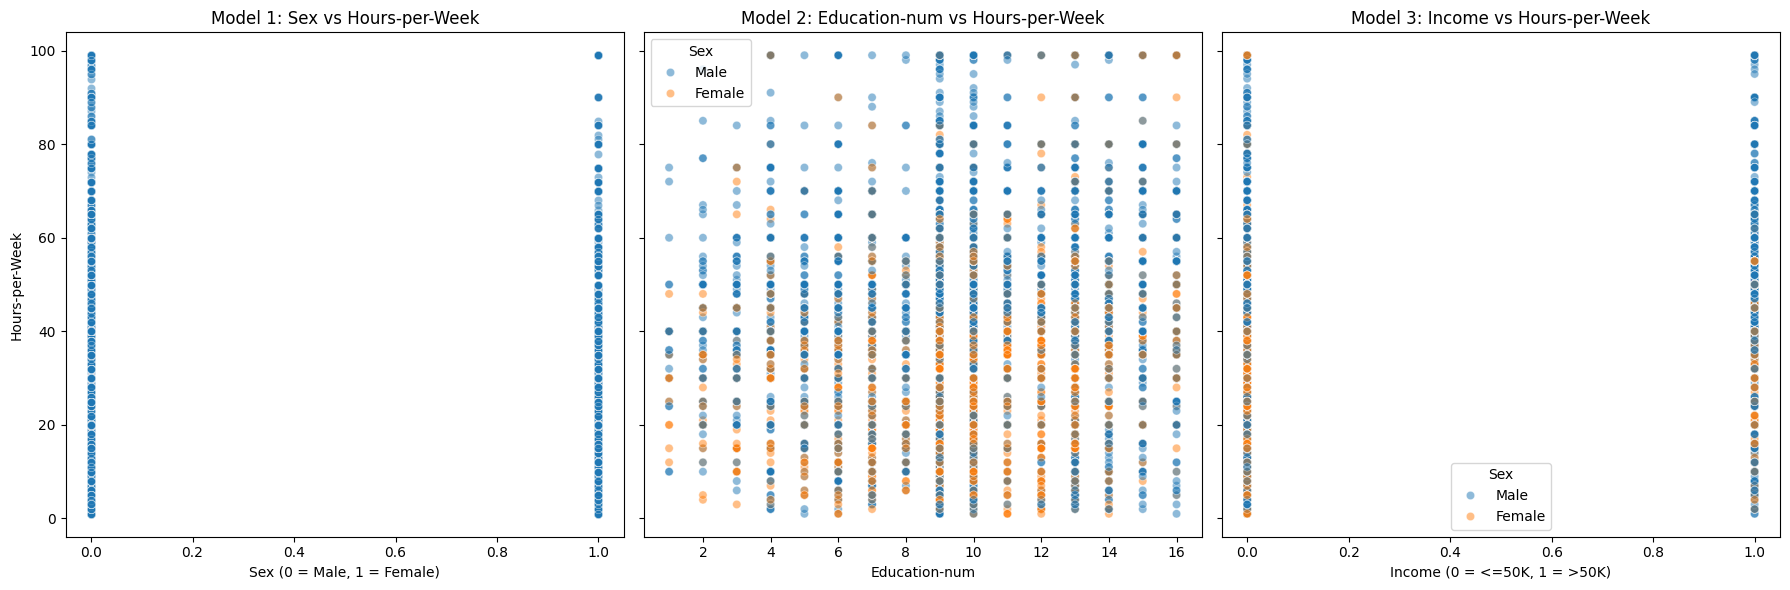

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Scatter plot for Model 1: sex vs hours-per-week
sns.scatterplot(ax=axes[0], x="sex_encoded", y="hours-per-week", data=df, alpha=0.5)
axes[0].set_title("Model 1: Sex vs Hours-per-Week")
axes[0].set_xlabel("Sex (0 = Male, 1 = Female)")
axes[0].set_ylabel("Hours-per-Week")

# Scatter plot for Model 2: sex + education-num vs hours-per-week
sns.scatterplot(ax=axes[1], x="education-num", y="hours-per-week", hue="sex", data=df, alpha=0.5)
axes[1].set_title("Model 2: Education-num vs Hours-per-Week")
axes[1].set_xlabel("Education-num")
axes[1].legend(title="Sex")

# Scatter plot for Model 3: sex + education-num + income vs hours-per-week
sns.scatterplot(ax=axes[2], x="income_encoded", y="hours-per-week", hue="sex", data=df, alpha=0.5)
axes[2].set_title("Model 3: Income vs Hours-per-Week")
axes[2].set_xlabel("Income (0 = <=50K, 1 = >50K)")
axes[2].legend(title="Sex")

# Adjust layout
plt.tight_layout()
plt.show()

## Density Plot of Residuals

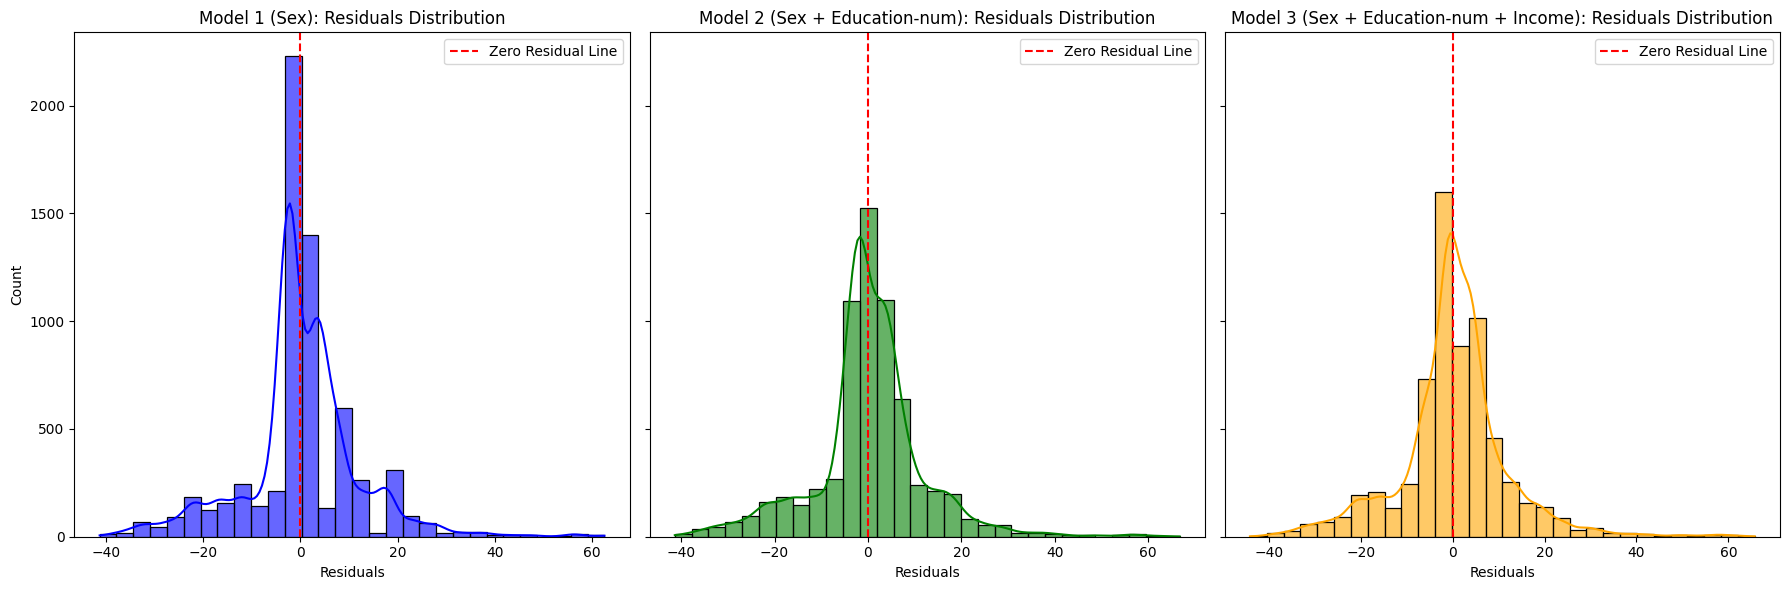

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Function to calculate residuals
def calculate_residuals(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    return residuals

# Calculate residuals for each model
residuals_model_1 = calculate_residuals(X1, y)
residuals_model_2 = calculate_residuals(X2, y)
residuals_model_3 = calculate_residuals(X3, y)

# Plot all density plots in the same figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Density plot for Model 1
sns.histplot(residuals_model_1, kde=True, bins=30, ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title("Model 1 (Sex): Residuals Distribution")
axes[0].set_xlabel("Residuals")
axes[0].axvline(0, color='red', linestyle='--', label='Zero Residual Line')
axes[0].legend()

# Density plot for Model 2
sns.histplot(residuals_model_2, kde=True, bins=30, ax=axes[1], color='green', alpha=0.6)
axes[1].set_title("Model 2 (Sex + Education-num): Residuals Distribution")
axes[1].set_xlabel("Residuals")
axes[1].axvline(0, color='red', linestyle='--', label='Zero Residual Line')
axes[1].legend()

# Density plot for Model 3
sns.histplot(residuals_model_3, kde=True, bins=30, ax=axes[2], color='orange', alpha=0.6)
axes[2].set_title("Model 3 (Sex + Education-num + Income): Residuals Distribution")
axes[2].set_xlabel("Residuals")
axes[2].axvline(0, color='red', linestyle='--', label='Zero Residual Line')
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## leverage vs Residuals (Cook's Distance Plot)

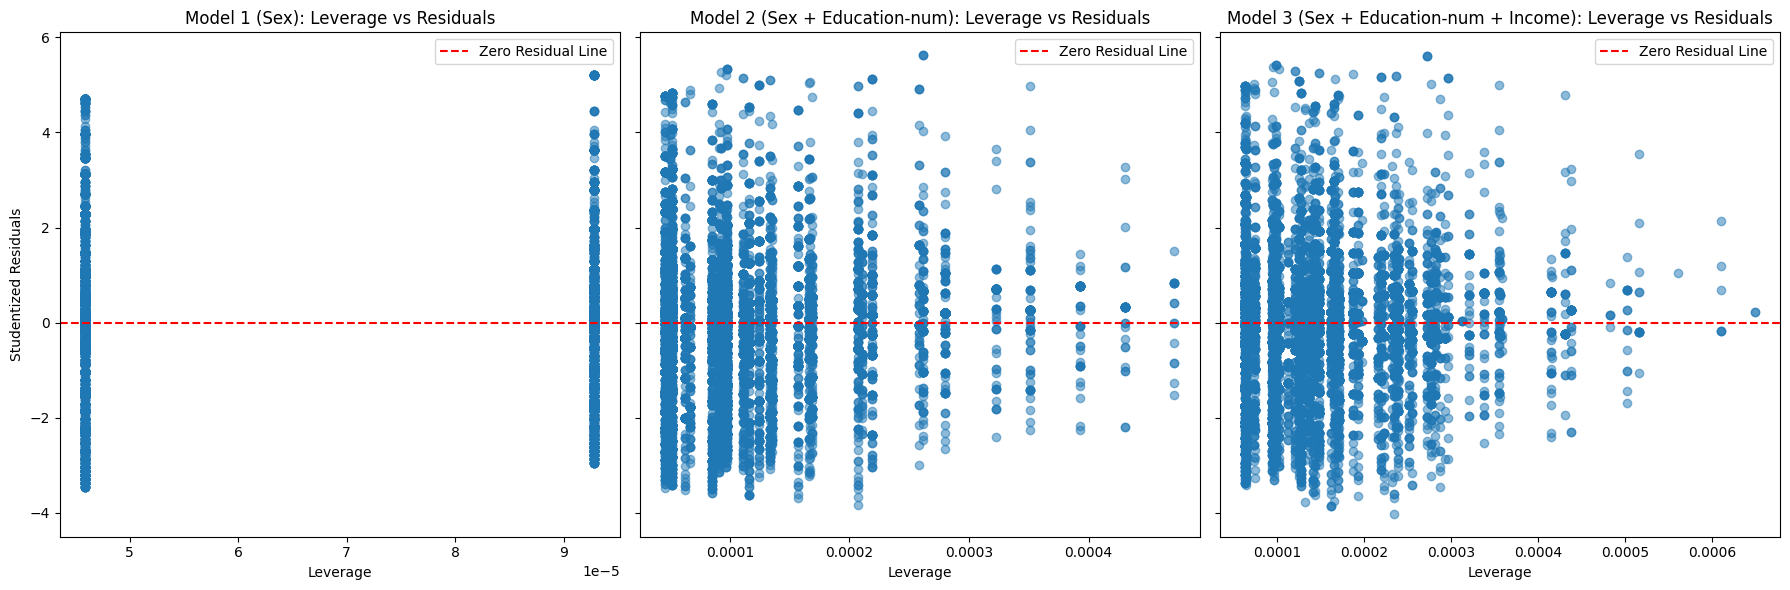

In [46]:
import statsmodels.api as sm

# Function to calculate leverage and residuals
def get_cooks_distance_data(X, y):
    X = sm.add_constant(X)  # Add constant term for statsmodels
    model = sm.OLS(y, X).fit()
    influence = model.get_influence()
    leverage = influence.hat_matrix_diag
    studentized_residuals = influence.resid_studentized
    return leverage, studentized_residuals

# Calculate data for each model
leverage_1, resid_1 = get_cooks_distance_data(X1, y)
leverage_2, resid_2 = get_cooks_distance_data(X2, y)
leverage_3, resid_3 = get_cooks_distance_data(X3, y)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for Model 1
axes[0].scatter(leverage_1, resid_1, alpha=0.5)
axes[0].set_title("Model 1 (Sex): Leverage vs Residuals")
axes[0].set_xlabel("Leverage")
axes[0].set_ylabel("Studentized Residuals")
axes[0].axhline(0, color='red', linestyle='--', label="Zero Residual Line")
axes[0].legend()

# Plot for Model 2
axes[1].scatter(leverage_2, resid_2, alpha=0.5)
axes[1].set_title("Model 2 (Sex + Education-num): Leverage vs Residuals")
axes[1].set_xlabel("Leverage")
axes[1].axhline(0, color='red', linestyle='--', label="Zero Residual Line")
axes[1].legend()

# Plot for Model 3
axes[2].scatter(leverage_3, resid_3, alpha=0.5)
axes[2].set_title("Model 3 (Sex + Education-num + Income): Leverage vs Residuals")
axes[2].set_xlabel("Leverage")
axes[2].axhline(0, color='red', linestyle='--', label="Zero Residual Line")
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()


## Partial Regression Plots (for multiple regression)

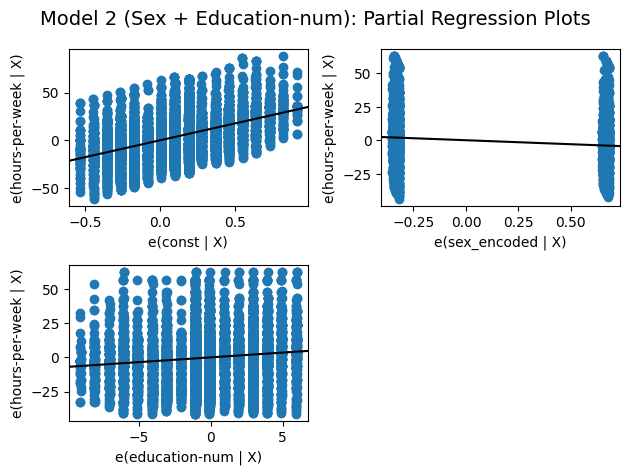

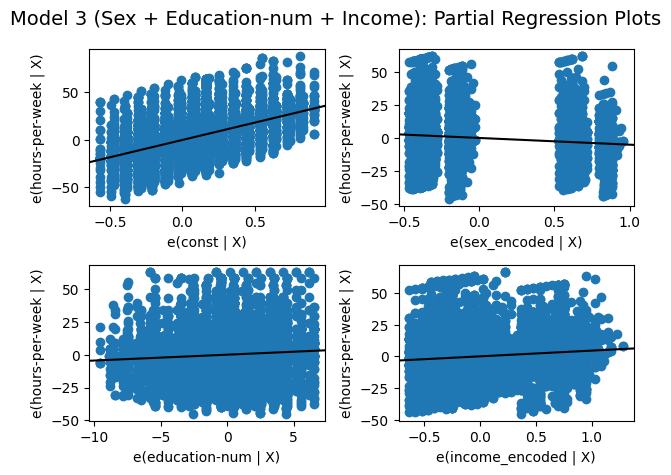

In [43]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

# Function to plot partial regression plots
def partial_regression_plots(X, y, title):
    X = sm.add_constant(X)  # Add constant term for statsmodels
    model = sm.OLS(y, X).fit()

    # Partial regression plots
    fig = plot_partregress_grid(model)
    plt.suptitle(f"{title}: Partial Regression Plots", fontsize=14)
    plt.tight_layout()
    plt.show()

# Apply only to multiple regression models (Model 2 and Model 3)
partial_regression_plots(X2, y, "Model 2 (Sex + Education-num)")
partial_regression_plots(X3, y, "Model 3 (Sex + Education-num + Income)")


---
## Let's focus a little more about "hours-per-week" and "sex"

In [49]:
# Group by 'sex' and calculate descriptive statistics
stats_by_gender = df.groupby("sex")["hours-per-week"].describe()
print("Descriptive Statistics by Gender:")
print(stats_by_gender)

Descriptive Statistics by Gender:
          count       mean        std  min   25%   50%   75%   max
sex                                                               
Female  10771.0  36.410361  11.811300  1.0  30.0  40.0  40.0  99.0
Male    21790.0  42.428086  12.119755  1.0  40.0  40.0  49.0  99.0


In [50]:
from scipy.stats import ttest_ind

# Separate hours-per-week by gender
male_hours = df[df["sex"] == "Male"]["hours-per-week"]
female_hours = df[df["sex"] == "Female"]["hours-per-week"]

# Perform t-test
t_stat, p_value = ttest_ind(male_hours, female_hours, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in hours worked between genders is statistically significant.")
else:
    print("The difference in hours worked between genders is not statistically significant.")

T-statistic: 42.88, P-value: 0.0000
The difference in hours worked between genders is statistically significant.


C:\Users\bay\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


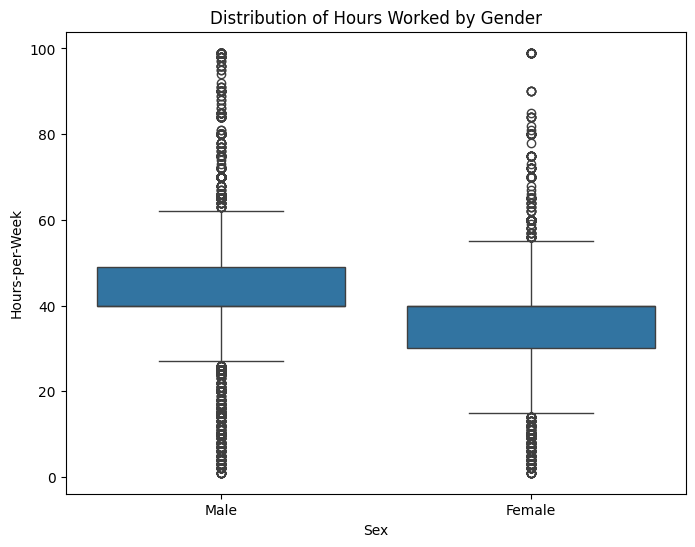

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="sex", y="hours-per-week", data=df)
plt.title("Distribution of Hours Worked by Gender")
plt.xlabel("Sex")
plt.ylabel("Hours-per-Week")
plt.show()

C:\Users\bay\AppData\Local\Temp\ipykernel_6584\9864479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trend = df.groupby(["age_group", "sex"])["hours-per-week"].mean().unstack()


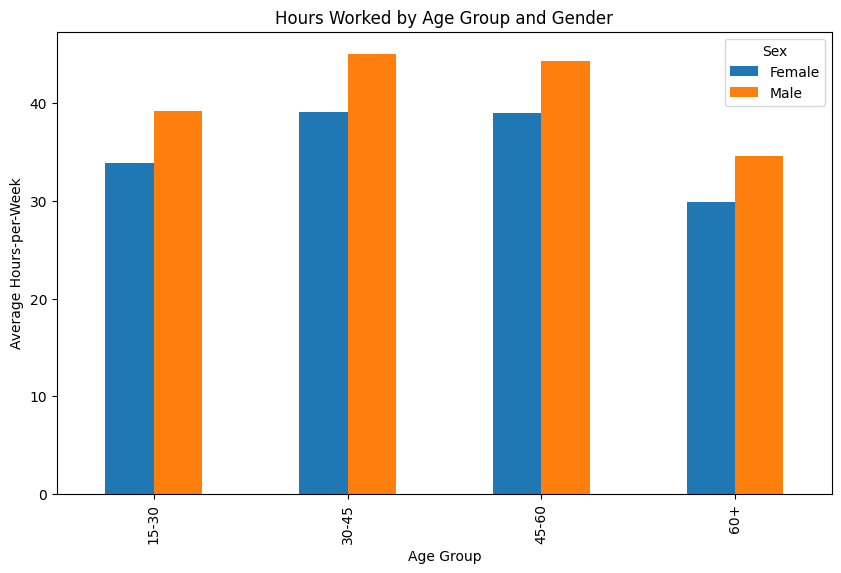

In [56]:
df["age_group"] = pd.cut(df["age"], bins=[15, 30, 45, 60, 100], labels=["15-30", "30-45", "45-60", "60+"])
age_trend = df.groupby(["age_group", "sex"])["hours-per-week"].mean().unstack()

# Plot
age_trend.plot(kind="bar", figsize=(10, 6))
plt.title("Hours Worked by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Hours-per-Week")
plt.legend(title="Sex")
plt.show()

---